<a href="https://colab.research.google.com/github/Dushmanthr/Sinhala_AI_Generated_Answer_Detection/blob/main/My_research_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sinling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.7 MB/s eta 0:00:00


In [ ]:
!pip install advertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install translate

In [ ]:
!pip install pyenchant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
from nltk.tokenize import sent_tokenize,word_tokenize,TweetTokenizer
from nltk.probability import FreqDist
import advertools as adv
from pathlib import Path
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn import linear_model

import codecs
import nltk
nltk.download('punkt')
import re

from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Processed.xlsx to Processed.xlsx


0                            රාවණා 1
1                     ලෝන්ලි ප්ලැනට්
2                             වූහාන්
3                              25200
4     ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය
5                            වලයාකාර
6             නෝත්රා දාම් දෙව්මැදුර 
7                             ලන්ඩන්
8                               චීනය
9                     උණ කුලයේ ශාඛයි
10                   මැක්සිම් ගෝර්කි
Name: Answers, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2641: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


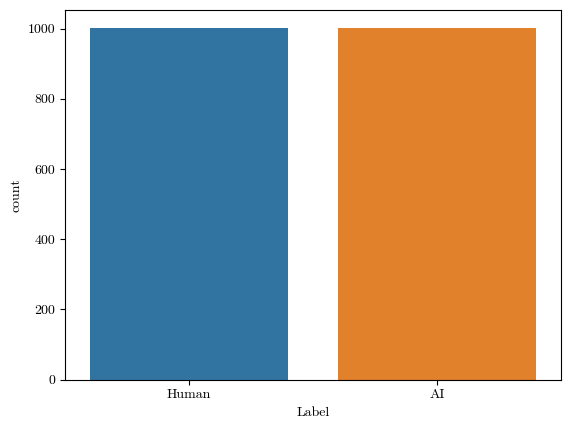

In [7]:
# %% read csv file data
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_excel('Processed.xlsx')
#pd.read_csv(Path().joinpath('data','traindata2.csv'))
print(file['Answers'].head(11))
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='Label',hue='Label',data=file)
plt.show()

In [8]:
df = pd.read_excel('Processed.xlsx')

print(df['Answers'])

0                                                 රාවණා 1
1                                          ලෝන්ලි ප්ලැනට්
2                                                  වූහාන්
3                                                   25200
4                          ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය
                              ...                        
2001    ශ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...
2002    ශ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේශ...
2003    ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...
2004    ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන "නිලා" නිර්...
2005    ඔව්, ශ්‍රී ලංකාවේ නූතන පන්සල් චිත්‍ර කථාවේ පුර...
Name: Answers, Length: 2006, dtype: object


In [10]:
stopwords_set = ["සහ","සමග","සමඟ","අහා","ආහ්","ආ","ඕහෝ","අනේ","අඳෝ","අපොයි","පෝ","අයියෝ","ආයි","ඌයි","චී","චිහ්","චික්","හෝ‍","දෝ",
                 "දෝහෝ","මෙන්","සේ","වැනි","බඳු","වන්","අයුරු","අයුරින්","ලෙස","වැඩි","හා","ය","නිසා","නිසාවෙන්","බවට","බව","බවෙන්","නම්","වැඩි","සිට",
                 "දී","මහා","මහ","පමණ","පමණින්","පමන","වන","විට","විටින්","මේ","මෙලෙස","මෙයින්","ඇති","ලෙස","සිදු","වශයෙන්","යන","සඳහා","මගින්","හෝ‍",
                 "ඉතා","ඒ","එම","ද","අතර","විසින්","සමග","පිළිබඳව","පිළිබඳ","තුළ","බව","වැනි","මහ","මෙම","මෙහි","මේ","වෙත","වෙතින්","වෙතට","වෙනුවෙන්",
                 "වෙනුවට","වෙන","ගැන","නෑ","අනුව","නව","පිළිබඳ","විශේෂ","දැනට","එහෙන්","මෙහෙන්","එහේ","මෙහේ","ම","තවත්","තව","සහ","දක්වා","ට","ගේ",
                 "එ","ක","ක්","බවත්","බවද","මත","ඇතුලු","ඇතුළු","මෙසේ","වඩා","වඩාත්ම","නිති","නිතිත්","නිතොර","නිතර","ඉක්බිති","දැන්","යලි","පුන","ඉතින්",
                 "සිට","සිටන්","පටන්","තෙක්","දක්වා","සා","තාක්","තුවක්","පවා","ද","හෝ‍","වත්","විනා","හැර","මිස","මුත්","කිම","කිම්","ඇයි","මන්ද","හෙවත්",
                 "නොහොත්","පතා","පාසා","ගානෙ","තව","ඉතා","බොහෝ","වහා","සෙද","සැනින්","හනික","එම්බා","එම්බල","බොල","නම්","වනාහි","කලී","ඉඳුරා",
                 "අන්න","ඔන්න","මෙන්න","උදෙසා","පිණිස","සඳහා","රබයා","නිසා","එනිසා","එබැවින්","බැවින්","හෙයින්","සේක්","සේක","ගැන","අනුව","පරිදි","විට",
                 "තෙක්","මෙතෙක්","මේතාක්","තුරු","තුරා","තුරාවට","තුලින්","නමුත්","එනමුත්","වස්",'මෙන්',"ලෙස","පරිදි","එහෙත්"]


In [11]:
print(stopwords_set)

['සහ', 'සමග', 'සමඟ', 'අහා', 'ආහ්', 'ආ', 'ඕහෝ', 'අනේ', 'අඳෝ', 'අපොයි', 'පෝ', 'අයියෝ', 'ආයි', 'ඌයි', 'චී', 'චිහ්', 'චික්', 'හෝ\u200d', 'දෝ', 'දෝහෝ', 'මෙන්', 'සේ', 'වැනි', 'බඳු', 'වන්', 'අයුරු', 'අයුරින්', 'ලෙස', 'වැඩි', 'හා', 'ය', 'නිසා', 'නිසාවෙන්', 'බවට', 'බව', 'බවෙන්', 'නම්', 'වැඩි', 'සිට', 'දී', 'මහා', 'මහ', 'පමණ', 'පමණින්', 'පමන', 'වන', 'විට', 'විටින්', 'මේ', 'මෙලෙස', 'මෙයින්', 'ඇති', 'ලෙස', 'සිදු', 'වශයෙන්', 'යන', 'සඳහා', 'මගින්', 'හෝ\u200d', 'ඉතා', 'ඒ', 'එම', 'ද', 'අතර', 'විසින්', 'සමග', 'පිළිබඳව', 'පිළිබඳ', 'තුළ', 'බව', 'වැනි', 'මහ', 'මෙම', 'මෙහි', 'මේ', 'වෙත', 'වෙතින්', 'වෙතට', 'වෙනුවෙන්', 'වෙනුවට', 'වෙන', 'ගැන', 'නෑ', 'අනුව', 'නව', 'පිළිබඳ', 'විශේෂ', 'දැනට', 'එහෙන්', 'මෙහෙන්', 'එහේ', 'මෙහේ', 'ම', 'තවත්', 'තව', 'සහ', 'දක්වා', 'ට', 'ගේ', 'එ', 'ක', 'ක්', 'බවත්', 'බවද', 'මත', 'ඇතුලු', 'ඇතුළු', 'මෙසේ', 'වඩා', 'වඩාත්ම', 'නිති', 'නිතිත්', 'නිතොර', 'නිතර', 'ඉක්බිති', 'දැන්', 'යලි', 'පුන', 'ඉතින්', 'සිට', 'සිටන්', 'පටන්', 'තෙක්', 'දක්වා', 'සා', 'තාක්', 'තුවක්', 'පවා', 'ද', 'හෝ\u200d', '

In [12]:
translate_words_dict = {
    "unp": "එක්සත් ජාතික පක්ෂය",
    "muslim": "මුස්ලිම්",
    "srilankanpolitics": "ශ්‍රී ලංකන් දේශපාලනය",
    "council": "සභාව",
    "sinhala": "සිංහල",
    "buddhist": "බෞද්ධ",
    "buddhism": "බුද්ධාගම",
    "srilanka": "ශ්‍රී ලංකාව",
    "racist": "ජාතිවාදී",
    "presidentialfirst": "පළමු ජනාධිපති",
    "feeling": "හැඟීම",
    "feminist": "ස්ත්‍රීවාදී",
    "loved": "ආදරය කළා",
    "team": "කණ්ඩායම",
    "tclsl":"ට්විටර් ක්‍රිකට් ලීගය ශ්‍රී ලංකාව",
    "pongal": "පොංගල්",
    "pongalfestival": "පොංගල් උත්සවය",
    "women": "කාන්තා",
    "nextpresidentinsl": "ශ්‍රී ලංකාවේ මීළඟ ජනාධිපති ",
    "seventhexecutivepresident": "හත්වන විධායක සභාපති",
    "hate": "වෛරය",
    "love": "ආදරය",
    "angry": "තරහයි",
    "doctor": "ඩොක්ටර්",
    "ltte": "එල්ටීටීඊය",
    "lka": "‍ශ්‍රී ලංකාව",
    "hurt": "රිදෙනවා",
    "typo": "යතුරු ලියනය",
    "racial": "වාර්ගික",
    "hatred": "වෛරය",
    "halal": "හලාල්",
    "wicket": "කඩුල්ල",
    "taker": "ටේකර්",
    "indoor": "ගෘහස්ථ",
    "attacker": "ප්‍රහාරකයා",
    "attack": "ප්රහාරය",
    "spikers": "ස්පිකර්ස්",
    "training": "පුහුණුව",
    "final": "අවසාන",
    "match": "තරගය",
    "tournament": "තරඟාවලිය",
    "youth": "තරුණ",
    "amen": "ආමෙන්",
    "enough": "ඇති",
    "standagainstracism": "ජාතිවාදයට එරෙහිව නැගී සිටින්න"
}

def translate_to_sinhala(word: str) -> str:
  word = word.lower()
  if word in translate_words_dict:
        return translate_words_dict[word]
  return word

In [13]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
stemmer = stemmer()

def stem_word(word: str) -> str:
    word= translate_to_sinhala(word)
    """
    Stemming words
    :param word: word
    :return: stemmed word
    """
    if len(word) < 4:
        return word

    # remove 'ට'
    if word[-1] == 'ට':
        return word[:-1]

    # remove 'ම'
    if word[-1] == 'ම':
        return word[:-1]

    # remove 'ද'
    if word[-1] == 'ද':
        return word[:-1]

    # remove 'ටත්'
    if word[-3:] == 'ටත්':
        return word[:-3]

    # remove 'එක්'
    if word[-3:] == 'ෙක්':
        return word[:-3]

    # remove 'යේ'
    if word[-2:] == 'යේ':
        return word[:-2]

    # remove 'ගෙ' (instead of ගේ because this step comes after simplifying text)
    if word[-2:] == 'ගෙ':
        return word[:-2]

    # remove 'එ'
    if word[-1:] == 'ෙ':
        return word[:-1]

    # remove 'ක්'
    if word[-2:] == 'ක්':
        return word[:-2]

    # remove 'වත්'
    if word[-3:] == 'වත්':
        return word[:-3]

    word=stemmer.stem(word)
    word=word[0]


    # else
    return word

In [14]:


def filter_stop_words(sentences):
    filtered_sentences = []
    detokenizer = Detok()
    for sentence in sentences:
        tokenized_sentence = word_tokenize(sentence)
        filtered_sentence = [word for word in tokenized_sentence if word not in stopwords_set]
        filtered_sentence = []
        for w in tokenized_sentence:
            if w not in stopwords_set:
                filtered_sentence.append(stem_word(w))
        filtered_sentences.append(filtered_sentence)
    return filtered_sentences





In [15]:
def detokenize(filtered_sentences):
    detokenized_sentences = []
    for sentence in filtered_sentences:
        detokenized_sentences.append(TreebankWordDetokenizer().detokenize(sentence))
    return detokenized_sentences

    print(detokenized_sentences)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Answers  2000 non-null   object
 1   Label    2006 non-null   object
dtypes: object(2)
memory usage: 31.5+ KB


In [17]:
df['Answers'] = df['Answers'].astype(str)

In [19]:
nltk.download('punkt_tab')
filtered_sentences = filter_stop_words(df['Answers'])
detokenized_sentences = detokenize(filtered_sentences)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
detokenized_sentences

['රාවණ 1',
 'ලෝන්ලි ප්ලැනට',
 'වූහා',
 '25200',
 'ආසි රග්බ පළ කාණ්ඩ ශූරතාව',
 'වලයාකාර',
 'නෝත්ර දා දෙව්මැදුර',
 'ලන්ඩ',
 'චීන',
 'උණ කුල ශාඛ',
 'මැක්සි ගෝර්',
 'ඇෆ්ලටොක්සී',
 'කියුබා',
 'කැරොලොය ජූරි',
 'පිහිනී',
 'ඉන්දියා',
 'ආචාර්\u200d ශිරාණි බණ්ඩාරනා',
 'ජිනී ස්විස්ටර්ලන්ත',
 'මිථාලි රාජ',
 'මධ්යධරණ මුහු රතු මුහු',
 'ෂෙයි හසී',
 'මේස පන්ද',
 'දක ඇමරික අන්දීස',
 'ජනමාධ්\u200d අමාත්යංශ',
 'ජී.බ . සේනන මහත',
 'චීන, තායිවාන සිංගප්පූර',
 'සෝඩිය ක්ලෝරයිඩ',
 'නීල ආර්ථික',
 'ෆැල්ක 9',
 'ශාන් නිකේතන',
 'රැම්සාර',
 'තාඩ',
 'ඩෙන්මාර්ක',
 'රැෆ්ලේශි ආර්නෝල්ඩ',
 'ස්විස්ටර්ලන්ත',
 'වැලන්ටි ටෙරෙෂ්කෝ',
 'මහාචාර් මොහා මුණසිංහ',
 'නේපාල',
 'සමුද්\u200dර පරිසර ආරක්ෂණ අධිකාර',
 'ෂෙන්ෂ 12',
 'මීටර 330',
 'ජෝර්ජ වොෂිංට',
 'සෙන්ට වින්සන්ට දූපත',
 'ගංග්න ස්ටයිල නැටු',
 'ජපාන',
 'ඩන්ක වයිට',
 'ජේ . රොබට ඕපන්හයිමර',
 'ජනමාධ්\u200dයවේද, සාහිත්\u200d කලා සංගීත ක්ෂේත්\u200dරය කුසලත',
 'ඉන්දියා',
 'කොළොම්බි විශ්වවිද්\u200dයාල',
 'චීන',
 'ඇමරිකා',
 '103',
 'පට්ටිපොළ',
 'රතු',
 'ඉත්තෑ මස් රතු මස් ගණය අ මස් වර්ග',

In [21]:
simplify_characters_dict = {
    # Consonant
    "ඛ": "ක",
    "ඝ": "ග",
    "ඟ": "ග",
    "ඡ": "ච",
    "ඣ": "ජ",
    "ඦ": "ජ",
    "ඤ": "ඥ",
    "ඨ": "ට",
    "ඪ": "ඩ",
    "ණ": "න",
    "ඳ": "ද",
    "ඵ": "ප",
    "භ": "බ",
    "ඹ": "බ",
    "ශ": "ෂ",
    "ළ": "ල",

    # Vowels
    "ආ": "අ",
    "ඈ": "ඇ",
    "ඊ": "ඉ",
    "ඌ": "උ",
    "ඒ": "එ",
    "ඕ": "ඔ",

}

In [22]:
def get_simplified_character(character: str) -> str:
    if len(character) != 1:
        raise TypeError("character should be a string with length 1")
    try:
        return simplify_characters_dict[character]
    except KeyError:
        return character

In [23]:
def simplify_sinhalese_text(text: str) -> str:
    """
    simplify
    :param text:
    :return:
    """
    modified_text = ""
    for c in text:
        modified_text += get_simplified_character(c)
    return modified_text

In [24]:
df['filtered_sentence'] = detokenized_sentences
df['filtered_sentence'] = df['filtered_sentence'].apply(simplify_sinhalese_text).tolist()
#df['filtered_sentence'] = df['Text'].apply(remove_english_words).tolist()

#df.to_csv('SubjectivityTagged.csv')
df.to_excel('stem.xlsx')

# Data Cleaning

In [25]:
df = pd.read_excel('stem.xlsx')


In [26]:
df['Text_cleaned'] = df['Answers'].str.replace('**',' ')
df['Text_cleaned'] = df['Text_cleaned'].str.replace('?',' ')

df['Text_cleaned'][1188]

'ස්ථූප ආකෘති හය මෙසේ නම් කළ හැකිය:\n\n1.  ධම්මචෙත්තිය  (Dhammacetiya) - භාෂිත ආකෘතිය\n2.  සුභූමිචෙත්තිය  (Subhūmicetiya) - පුෂ්ප ආකෘතිය\n3.  වජ්\u200dරචෙත්තිය  (Vajiracetiya) - සුල ගොමන ආකෘතිය\n4.  මනිචෙත්තිය  (Manicetiya) - ස්කන්ධක ආකෘතිය\n5.  බුද්ධකෙත්තිය  (Buddhaketiya) - වඩුගෙය ආකෘතිය\n6.  කඨිනචෙත්තිය  (Kaṭhinacetiya) - කොණ්ඩෝටු ආකෘතිය'

In [28]:
# english-sinhala dictionary
dictionary = {}
df_translate= pd.read_csv('en-sinhala dictionary.csv')
dictionary_file = df_translate["En,sinhala"]

for line in dictionary_file:
    key, value = line.strip().split(",")
    dictionary[key] = value

In [29]:
# to check whether the string contains English words(any)
def translate_english(x):
    for word1 in x.split():
        new_word = ''.join(i for i in word1 if not i.isdigit())
        x = x.replace(word1, new_word)
    for word in x.split():
        word2 = "".join(l for l in word if l not in string.punctuation)
        if re.match('[a-zA-Z]', word2) is not None:
            word1 = word2.lower()
            translated_word = dictionary.get(word1)
            if translated_word is None:
                translated_word = ''
            x = x.replace(word, translated_word)
    return x

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2006 non-null   int64 
 1   Answers            2000 non-null   object
 2   Label              2006 non-null   object
 3   filtered_sentence  2000 non-null   object
 4   Text_cleaned       2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.5+ KB


In [31]:

def clean_data(dataframe):
    # Drop duplicate rows
    dataframe.drop_duplicates(subset='Answers', inplace=True)

    #punctuation removal
    string_text = dataframe['Text_cleaned'].str
    dataframe['Text_cleaned'] = string_text.translate(str.maketrans('', '', string.punctuation))
    print(string_text)

    # coerced entire coloumn to str dtype
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].astype(str)

    #translate English to sinhala
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_to_sinhala).tolist()
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_english).tolist()

    # simplify sinhala characters
    df['Text_cleaned'] = df['Text_cleaned'].apply(simplify_sinhalese_text).tolist()

    # pos tagging
    #df['Text'] = df['Text'].apply(tagger.predict).tolist()

    #print("New shape:", dataframe.shape)
    return dataframe.head()

clean_data(df)
df

,Unnamed: 0,Answers,Label,filtered_sentence,Text_cleaned
0,0,රාවණා 1,Human,රාවන 1,රාවනා
1,1,ලෝන්ලි ප්ලැනට්,Human,ලෝන්ලි ප්ලැනට,ලෝන්ලි ප්ලැනට්
2,2,වූහාන්,Human,වූහා,වූහාන්
3,3,25200,Human,25200,
4,4,ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය,Human,අසි රග්බ පල කාන්ඩ ෂූරතාව,අසියා රග්බී පලමු කාන්ඩ ෂූරතාවය
...,...,...,...,...,...
2001,2001,ශ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...,AI,ෂ්‍ර ලංක ප්‍රථ සිංහ දිනපත පුවත්පත ව * * දිවයි ...,ෂ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...
2002,2002,ශ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේශ...,AI,ෂ්‍ර ලංක ප්‍රථ ඉරිද පුවත්පත ව ස්වදේෂ මිතෘ (swa...,ෂ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේෂ...
2003,2003,ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...,AI,"ෂ්‍ර ලංක ප්‍රථ චිත්‍ර කතා සැලකෙ * *"" න"" * * . ...",ෂ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...
2004,2004,"ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන ""නිලා"" නිර්...",AI,"ෂ්‍ර ලංක ප්‍රථ චිත්‍ර කතා ""න"" නිර්මාන කලේ ප්‍ර...",ෂ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන නිලා නිර්මා...


In [32]:
df.to_excel('clean.xlsx')

In [33]:
df = df.dropna(how='all')

In [34]:
df.to_excel('clean.xlsx')